In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [3]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
order_products_prior#

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [5]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [6]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [7]:
orders['user_id'].nunique()

206209

# Introduction

About Instacart: American technology company that operates as a same-day grocery delivery and pick-up service. <br/>
About Team: We are the data scientists from Instacart / grocery shopping lover <br/>
Aim: Explore the customer dataset to help the company build the data pipeline which can be used to a serve customers' needs better.

# Data

There are 5 cleaned csv files including the information about orders from Instacart.
1. aisle dataset: contains 134 kinds of product categories.

2. departments dataset: 134 product catalogs are divided into 21 departments
3. order_products__prior & order_products_train dataset: These datasets specify which products were purchased in each order and how many time the product added to the shopping cart and if it’s reordered. 

4. orders dataset: This dataset tells to the order id, the products of a an order, the time/day transaction, which set (prior, train, test) an order belongs. 
5. products dataset: It contains 49,688 kinds of products, which department/aisle it belong


# Exploratory Data Analysis(EDA)

## Orders & Customers

1. Customers: There are 206209 cutomers in our dataset with 131209 treated as training data and 75000 as test dataset.
2. Orders: The average order number of the customer is 16.59
The minimal order number of a customer is 4 and the maximum order numer of a customer is 100

So how many orders a customer usally made from instacart?

In [8]:
num_order = orders[['user_id','order_id']].groupby(['user_id']).count().reset_index()

In [9]:
num_order.rename(columns={'order_id':'order_count'}, inplace=True)

In [10]:
num_order

,user_id,order_count
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


In [11]:
print('The average order number of the customer is {}'.format(np.mean(num_order['order_count'])))
print('The minimal order number of a customer is {} and the maximum order numer of a customer is {}'.format(num_order['order_count'].min(), num_order['order_count'].max()))

The average order number of the customer is 16.590367054784224
The minimal order number of a customer is 4 and the maximum order numer of a customer is 100


Orders 

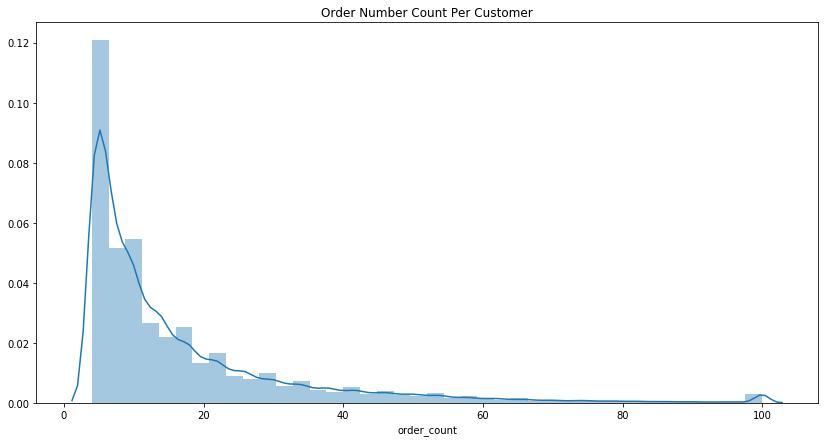

In [12]:
plt.figure(figsize=(14,7))
sns.distplot(num_order['order_count'], bins=40).set_title('Order Number Count Per Customer')
plt.show()

The average number a cutomer ordered from Instacart is 17 times with the minimal order number 4 and the largest number order 100(Instacartaholic :D). Most customers ordered orders number centered between 4-10.

In [13]:
order_day = orders['order_dow'].value_counts().to_frame().reset_index()

In [14]:
order_day

,index,order_dow
0,0,600905
1,1,587478
2,2,467260
3,5,453368
4,6,448761
5,3,436972
6,4,426339


## Orders & Day of Week

Text(0.5, 1.0, 'Orders Placed During a Week')

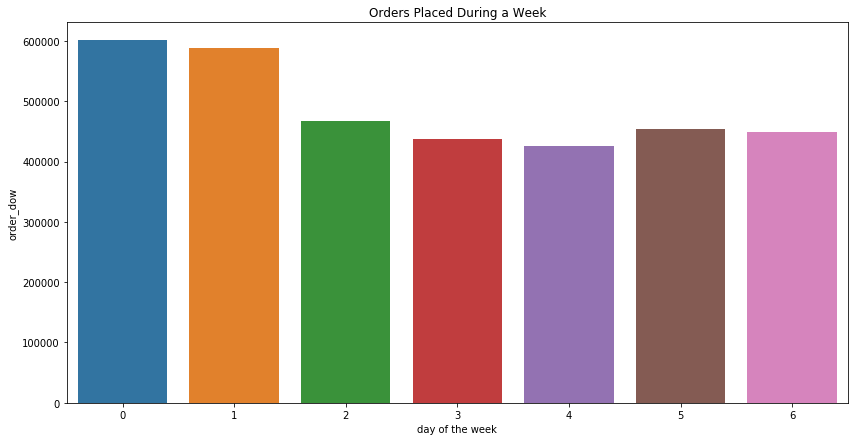

In [15]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='order_dow', data=order_day).set_xlabel('day of the week')
plt.title('Orders Placed During a Week')

From the barshart,obviously, people like to do online grocery shopping on Sunday and Monday.

In [16]:
order_hour = orders['order_hour_of_day'].value_counts().to_frame().reset_index()

In [17]:
order_hour

,index,order_hour_of_day
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999
5,12,272841
6,16,272553
7,9,257812
8,17,228795
9,18,182912


## Orders & Hour

Text(0.5, 1.0, 'Orders Placed During a Day')

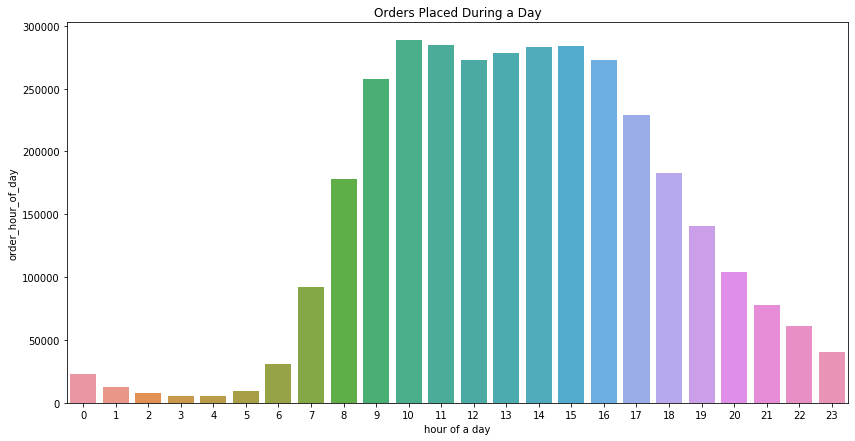

In [18]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='order_hour_of_day', data=order_hour).set_xlabel('hour of a day')
plt.title('Orders Placed During a Day')

In [19]:
#merge products and order_products_prior to know the hottest department
order_department = pd.merge(order_products_prior,products, on = 'product_id',how='left')

In [20]:
order_department.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
5,2,17794,6,1,Carrots,83,4
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,Classic Blend Cole Slaw,123,4
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16


In [21]:
order_department = pd.merge(order_department, departments, on='department_id',how='left')

In [22]:
hot_product = order_department['product_name'].value_counts().to_frame(name='number').reset_index().head(51)

In [23]:
hot_product.head(51)

,index,number
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## Hot Products

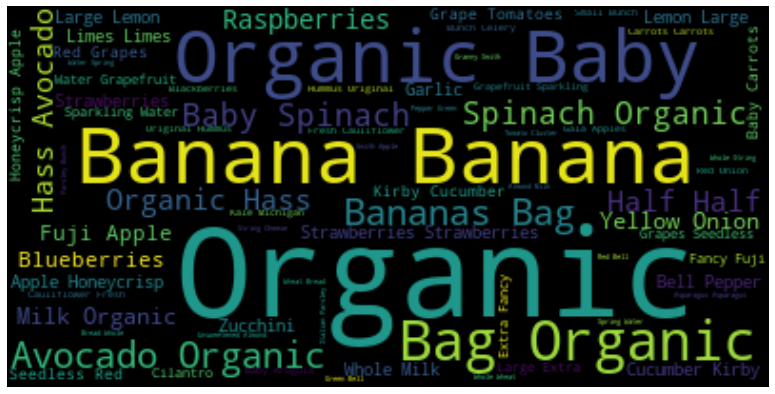

In [24]:
hot_product['number'] = round(hot_product['number']/10000).astype('int32')
hot_product['index']=hot_product['index'] +' '
hoted_list_product =hot_product['index']*hot_product['number'].to_list()
joined_list = ' '.join(hoted_list_product)
plt.figure(figsize=(14,7))
wordcloud = WordCloud().generate(joined_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

People love buying organic stuff from Instacart.

In [25]:
hottie = order_department['department'].value_counts().to_frame(name='number').reset_index()

In [26]:
hottie

,index,number
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


[]

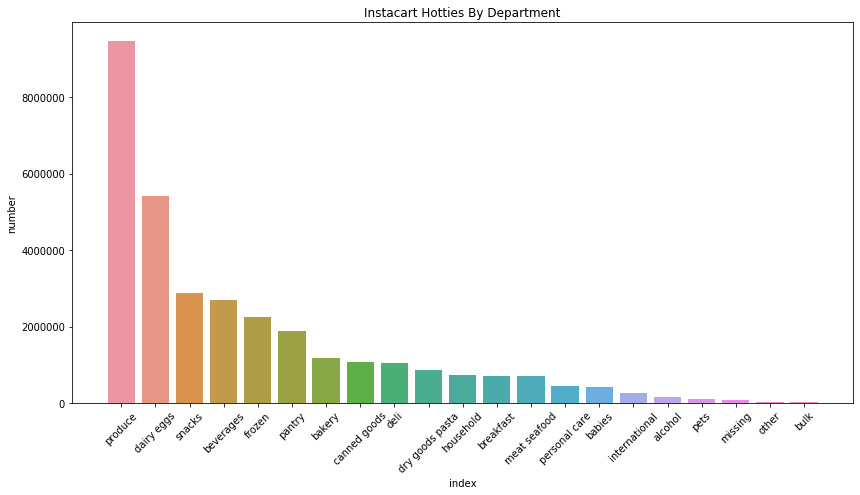

In [27]:
plt.figure(figsize=(14,7))
g = sns.barplot(x='index',y='number',data=hottie).set_title('Instacart Hotties By Department')
plt.xticks(rotation=45)
plt.plot()

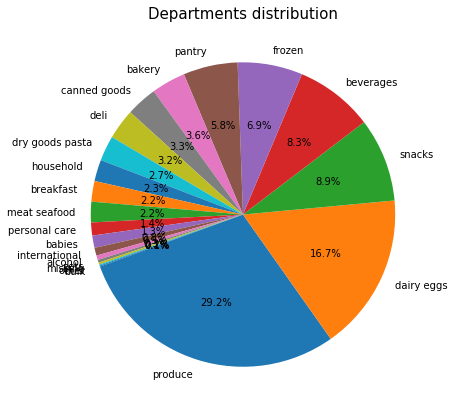

In [28]:
plt.figure(figsize=(14,7))
temp_series = order_department['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce and dairy & eggs are the 2 departments that have the most order and product diversity.

In [29]:
order_products_prior['product_id'].value_counts()

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
11356         1
18001         1
6320          1
26268         1
30087         1
Name: product_id, Length: 49677, dtype: int64

In [30]:
egg = order_department[order_department['department_id']==16]
produce = order_department[order_department['department_id']==20]

In [31]:
egg['product_name'].nunique()

3448

In [32]:
produce['product_name'].nunique()

1322

In [33]:
produce.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
32,5,47329,3,1,Fresh Fruit Salad,1,20,deli
93,11,27085,2,1,Mango Pineapple Salsa,67,20,deli
171,18,1057,28,0,"Basil, Asiago & Pine Nut Pesto Ravioli",13,20,deli
183,21,5009,1,1,Yuba Tofu Skin,14,20,deli
184,21,33106,2,1,Organic Firm Tofu,14,20,deli


In [34]:
producee = produce['product_name'].value_counts().to_frame(name='number').reset_index()

### Produce

In [35]:
print('There are {} unique value in the Produce category.'.format(len(producee)-1))
print('The median value of order times in the Produce department is {}.'.format(producee['number'].median()))
print('The mean value of order times in the Produce department is {}.'.format(producee['number'].mean()))

There are 1321 unique value in the Produce category.
The median value of order times in the Produce department is 115.0.
The mean value of order times in the Produce department is 795.1959152798789.


In [36]:
producee

,index,number
0,Original Hummus,71314
1,Uncured Genoa Salami,41473
2,Organic Extra Firm Tofu,29124
3,Organic Roasted Turkey Breast,28384
4,Oven Roasted Turkey Breast,20069
...,...,...
1317,Loaded Cheddar Potato Bake Cups,2
1318,Pork Roll,2
1319,Blackened Turkey,1
1320,Flame Roasted Red Peppers Spreadable Cheese,1


[]

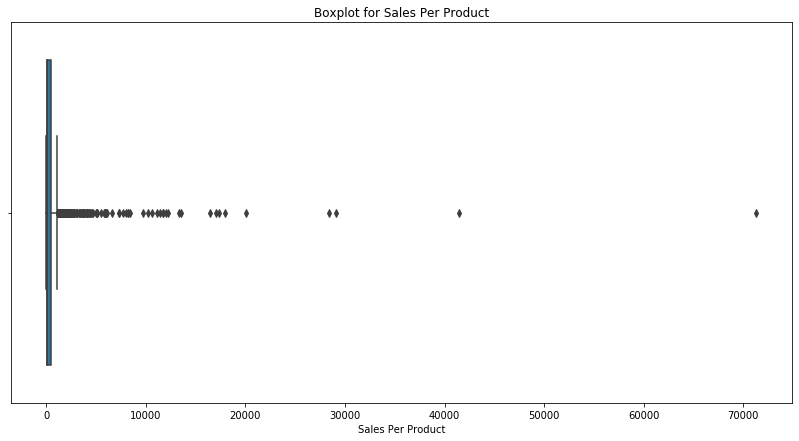

In [37]:
plt.figure(figsize=(14,7))
sns.boxplot(producee['number']).set_xlabel('Sales Per Product')
plt.title('Boxplot for Sales Per Product')
plt.plot()

In [38]:
produce_more_than20000 = producee[producee['number']>20000]

In [39]:
produce_more_than20000['number'].sum()/producee['number'].sum()

0.18108364431262242

In [40]:
(len(produce_more_than20000)-1)/(len(producee)-1)

0.003028009084027252

/Users/lilijiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lilijiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


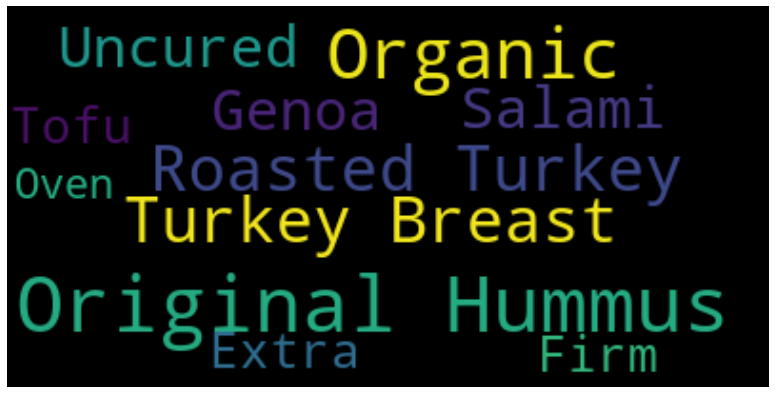

In [41]:
produce_more_than20000['number'] = round(produce_more_than20000['number']/10000).astype('int32')
produce_more_than20000['index']=produce_more_than20000['index'] +' '
hoted_list_produce = produce_more_than20000['index']*produce_more_than20000['number'].to_list()
joined_list = ' '.join(hoted_list_produce)
plt.figure(figsize=(14,7))
wordcloud = WordCloud().generate(joined_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
hot_egg_dairy = egg['product_name'].value_counts().to_frame(name='number').reset_index()

In [43]:
hot_egg_dairy.head(200)

,index,number
0,Organic Whole Milk,137905
1,Organic Half & Half,76360
2,Half & Half,69217
3,Organic Whole String Cheese,59676
4,Organic Unsweetened Almond Milk,57895
...,...,...
195,Mozzarella Cheese,6558
196,Monterey Jack Cheese,6543
197,Special Reserve Extra Sharp Cheddar Cheese,6536
198,Grade AA Large White Eggs,6506


[]

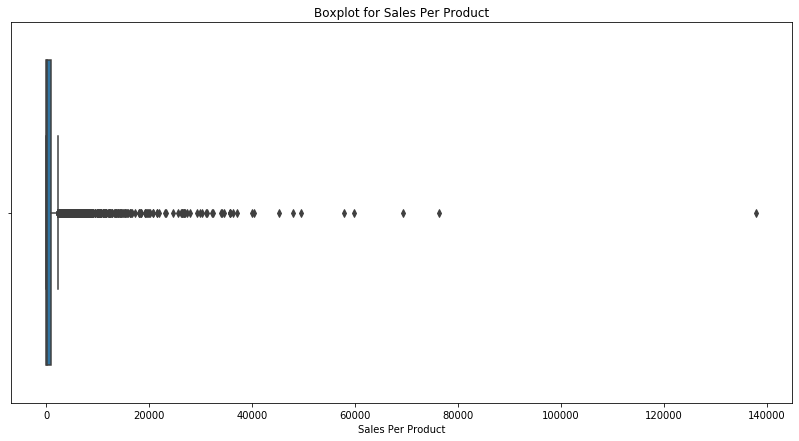

In [44]:
plt.figure(figsize=(14,7))
sns.boxplot(hot_egg_dairy['number']).set_xlabel('Sales Per Product')
plt.title('Boxplot for Sales Per Product')
plt.plot()

In [45]:
print('There are {} unique value in the Egg & Dairy category.'.format(len(hot_egg_dairy)-1))
print('The median value of order times in the Egg & Dairy department is {}.'.format(hot_egg_dairy['number'].median()))
print('The mean value of order times in the Egg & Dairy department is {}.'.format(hot_egg_dairy['number'].mean()))

There are 3447 unique value in the Egg & Dairy category.
The median value of order times in the Egg & Dairy department is 206.0.
The mean value of order times in the Egg & Dairy department is 1570.1902552204176.


In [46]:
hooot = hot_egg_dairy[hot_egg_dairy['number']>20000]

/Users/lilijiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lilijiaxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


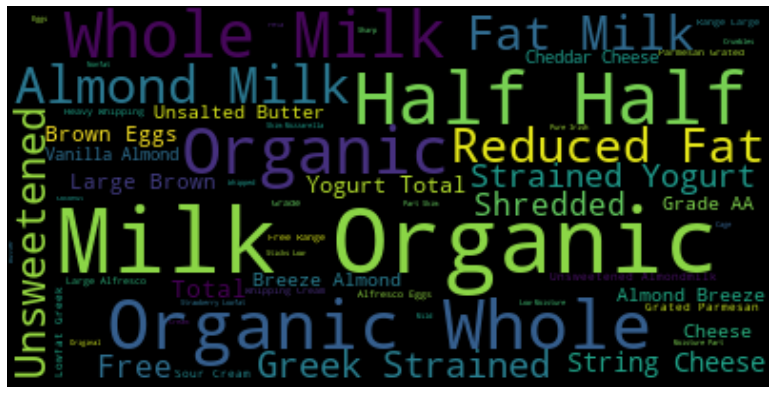

In [47]:
hooot['number'].sum()/hot_egg_dairy['number'].sum()
hooot['number'] = round(hooot['number']/10000).astype('int32')
hooot['index']=hooot['index'] +' '
hoted_list = hooot['index']*hooot['number'].to_list()
joined_list = ' '.join(hoted_list)
plt.figure(figsize=(14,7))
wordcloud = WordCloud().generate(joined_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Reorder

[]

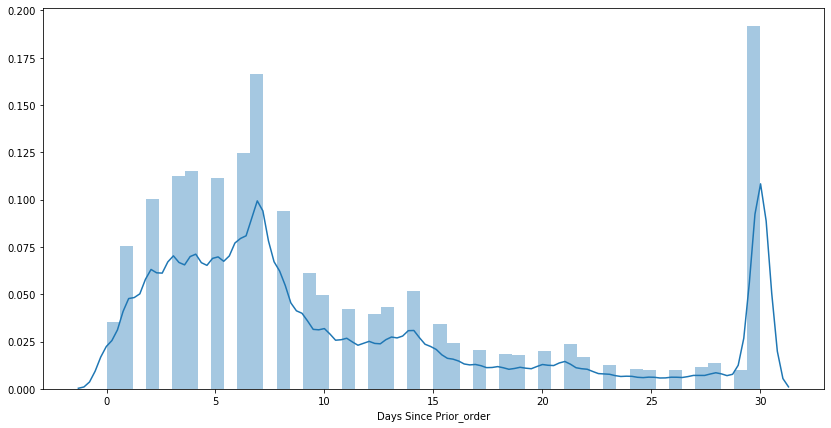

In [48]:
plt.figure(figsize=(14,7))
reorder = orders.dropna()
sns.distplot(reorder['days_since_prior_order']).set_xlabel('Days Since Prior_order')
plt.plot()

Reorder happened the most in the 7th days and 30th days interval.

There are 19126536 products were reordered and 13307953 products were not. Let's explore the relationship between reorder and department, order hour, Add to cart order.

In [49]:
order_department['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

which department product are more likely to be reordered?

In [50]:
order_department.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry


In [51]:
#merge the dataset to the way with reorder number and total number of data and calculate ratio
reorder_dept = order_department.groupby('department')['reordered'].sum().to_frame(name='reordered_number').reset_index()
count = order_department.groupby('department')['reordered'].count().to_frame().reset_index()
reorder_df = pd.merge(count, reorder_dept, on='department', how='left')

In [52]:
reorder_df['reorder_ratio'] = reorder_df['reordered_number'] / reorder_df['reordered']

In [53]:
reorder_df.sort_values(by=['reorder_ratio'], inplace=True)
reorder_df

,department,reordered,reordered_number,reorder_ratio
17,personal care,447123,143584,0.321129
16,pantry,1875577,650301,0.346721
12,international,269253,99416,0.369229
14,missing,69145,27371,0.395849
11,household,738666,297075,0.402178
15,other,36291,14806,0.407980
6,canned goods,1068058,488535,0.457405
9,dry goods pasta,866627,399581,0.461076
10,frozen,2236432,1211890,0.541885
4,breakfast,709569,398013,0.560922


### Reorder & Department

[]

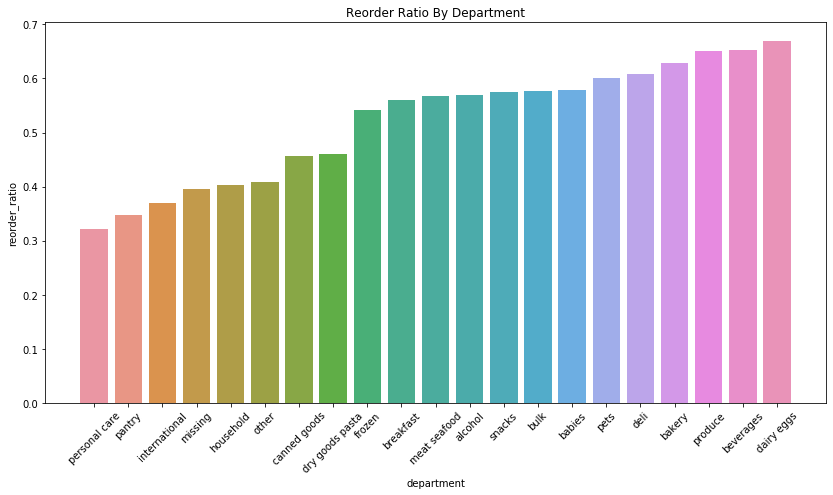

In [54]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'department', y='reorder_ratio', data=reorder_df).set_title('Reorder Ratio By Department')
plt.xticks(rotation=45)
plt.plot()

The Dairy&Eggs have the highest reorder ratio: 67%, followed by Beverages 65.3% and Produce departments 65%.

### Reorder & Add to cart order

In [55]:
order_department['add_to_cart_order'].value_counts()

1      3214874
2      3058126
3      2871133
4      2664106
5      2442025
        ...   
144          1
140          1
139          1
138          1
145          1
Name: add_to_cart_order, Length: 145, dtype: int64

In [56]:
order_department["add_to_cart_order_mod"] = order_department["add_to_cart_order"].copy()
order_department["add_to_cart_order_mod"].ix[order_department["add_to_cart_order_mod"]>70] = 70
grouped_df = order_department.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(14,7))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'Series' object has no attribute 'ix'

There are 145 add_to_cart value from 1-145, which means some products are put into customers shopping cart 1 time and some are put into cart 145 times.

Within the 50 add_to_cart value, it shows a linear negative correlationship. The more times the stuff added into the shopping more, they are less likely to be ordered.

### Reorder & Hour in the day/ Day of week

In [ ]:
reorder_hour = pd.merge(orders, order_department, on='order_id', how='left')

In [ ]:
reorder_hour.head()

In [ ]:
reorder_H = reorder_hour.groupby('order_hour_of_day')['reordered'].sum().to_frame().reset_index()
reorder_H_amount = reorder_hour.groupby('order_hour_of_day')['reordered'].count().to_frame().reset_index()
merged = pd.merge(reorder_H_amount, reorder_H, how='left', on='order_hour_of_day')
merged['ratio'] = merged['reordered_y']/merged['reordered_x']
merged.sort_values(by=['ratio'], inplace=True)

In [ ]:
merged

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x='order_hour_of_day', y='ratio', data=merged).set_title('Hour-Reorder Ratio')
plt.plot()

In [ ]:
reorder_D = reorder_hour.groupby('order_dow')['reordered'].sum().to_frame().reset_index()
reorder_D_amount = reorder_hour.groupby('order_dow')['reordered'].count().to_frame().reset_index()
merged_D = pd.merge(reorder_D_amount, reorder_D, how='left', on='order_dow')
merged_D['ratio'] = merged_D['reordered_y']/merged_D['reordered_x']
merged_D.sort_values(by=['ratio'], inplace=True)

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x='order_dow', y='ratio', data=merged_D).set_title('Day Of Week-Reorder Ratio')
plt.plot()

There are no significant difference of reorder among days within a week. The reorder mostly happened in the 6-8 pm in the day.

# Conclusion:
1. People like to go grocery shopping from Instacart on Sunday & Monday and from 9AM to 3PM.
2. People love buying organic stuff from Instacart. Produce and dairy & eggs are the 2 departments that have the most order and product diversity.
3. Reorder happened the most in the 7th days and 30th days interval.
4. Reorder is highly related to product-add-to-cart: The more times the stuff added into the shopping more, they are less likely to be ordered.
4. In the morning(6am-8am), products are more likely to be reordered.
